In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import arange

En primer lugar, importamos la base de datos limpia realizada en pasos anteriores.

In [2]:
df=pd.read_csv('datos_limpios.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8519 entries, 0 to 8518
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8519 non-null   object 
 1   Item_Weight                8519 non-null   float64
 2   Item_Fat_Content           8519 non-null   object 
 3   Item_Visibility            8519 non-null   float64
 4   Item_Type                  8519 non-null   object 
 5   Item_MRP                   8519 non-null   float64
 6   Outlet_Identifier          8519 non-null   object 
 7   Outlet_Establishment_Year  8519 non-null   int64  
 8   Outlet_Size                8519 non-null   object 
 9   Outlet_Location_Type       8519 non-null   object 
 10  Outlet_Type                8519 non-null   object 
 11  Item_Outlet_Sales          8519 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 798.8+ KB


En primer lugar, revisamos la matriz de correlación de las variables numéricas del problema. Donde podemos ver que la principal correlación se da entre las Ventas y el Precio del producto, donde a mayor precio, mayor venta. 

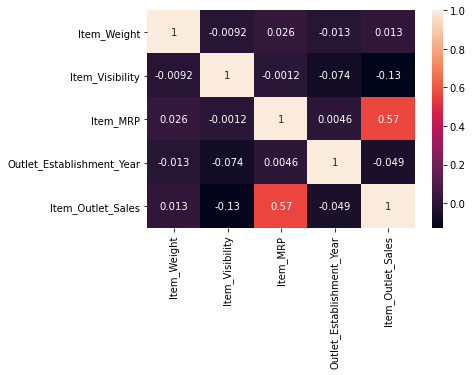

In [38]:
corrMatrix=df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

Para continuar, realizaremos un histograma de las ventas por tienda e item, donde podemos observar que a nivel general las ventas item-sala suelen ser de hasta 4000, posterior a este monto la probabilidad de que la venta tenga ese monto es menor.

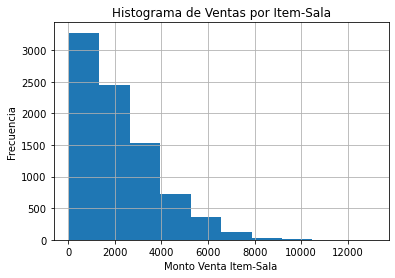

In [43]:
df['Item_Outlet_Sales'].hist()
plt.title('Histograma de Ventas por Item-Sala')
plt.xlabel('Monto Venta Item-Sala')
plt.ylabel('Frecuencia')
plt.show()

## Comportamiento de Ventas Item-Local por tipo de Producto

Dado que las ventas pueden variar dependiendo del tipo de producto (variable cualitativa), a continuación realizaremos histogramas de las ventas por tipo de producto para entender su comportamiento. 

En primer lugar, realizamos una lista con los tipos de producto que existen para poder ser utilizado en los gráficos.

In [9]:
tipos_prod=list((df['Item_Type'].drop_duplicates()))
len(df['Item_Type'].value_counts())

16

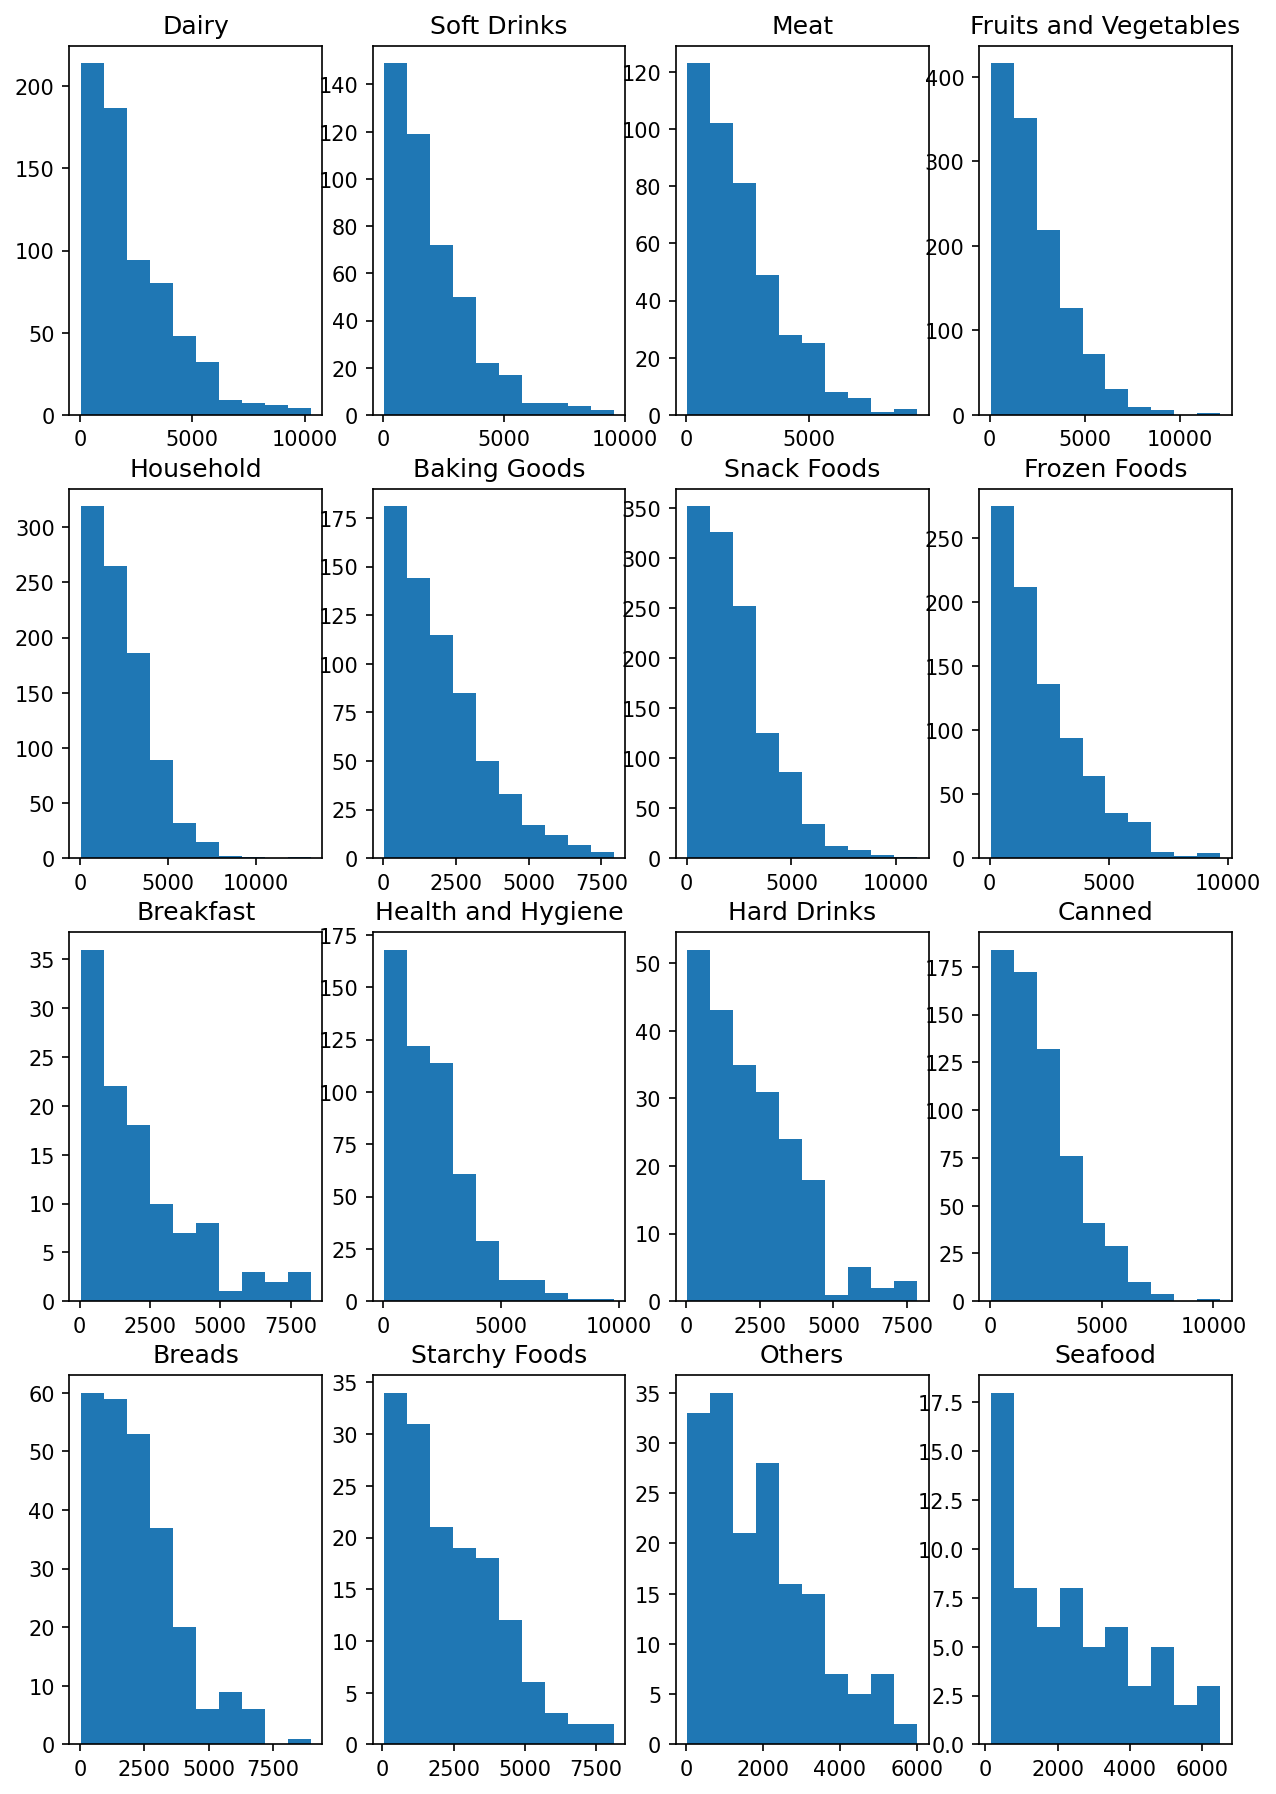

In [26]:
lista=list(set(df['Item_Type']))
fig1 = plt.figure(figsize=(10,15),dpi=150)

ax1 = fig1.add_subplot(4,4,1)
ax2 = fig1.add_subplot(4,4,2)
ax3 = fig1.add_subplot(4,4,3)
ax4 = fig1.add_subplot(4,4,4)
ax5 = fig1.add_subplot(4,4,5)
ax6 = fig1.add_subplot(4,4,6)
ax7 = fig1.add_subplot(4,4,7)
ax8 = fig1.add_subplot(4,4,8)
ax9 = fig1.add_subplot(4,4,9)
ax10 = fig1.add_subplot(4,4,10)
ax11 = fig1.add_subplot(4,4,11)
ax12 = fig1.add_subplot(4,4,12)
ax13 = fig1.add_subplot(4,4,13)
ax14 = fig1.add_subplot(4,4,14)
ax15 = fig1.add_subplot(4,4,15)
ax16 = fig1.add_subplot(4,4,16)

ax1.hist(df.loc[df['Item_Type']==tipos_prod[0],:]['Item_Outlet_Sales'],bins=10)
ax2.hist(df.loc[df['Item_Type']==tipos_prod[1],:]['Item_Outlet_Sales'], bins=10)
ax3.hist(df.loc[df['Item_Type']==tipos_prod[2],:]['Item_Outlet_Sales'],bins=10)
ax4.hist(df.loc[df['Item_Type']==tipos_prod[3],:]['Item_Outlet_Sales'], bins=10)
ax5.hist(df.loc[df['Item_Type']==tipos_prod[4],:]['Item_Outlet_Sales'],bins=10)
ax6.hist(df.loc[df['Item_Type']==tipos_prod[5],:]['Item_Outlet_Sales'], bins=10)
ax7.hist(df.loc[df['Item_Type']==tipos_prod[6],:]['Item_Outlet_Sales'],bins=10)
ax8.hist(df.loc[df['Item_Type']==tipos_prod[7],:]['Item_Outlet_Sales'], bins=10)
ax9.hist(df.loc[df['Item_Type']==tipos_prod[8],:]['Item_Outlet_Sales'],bins=10)
ax10.hist(df.loc[df['Item_Type']==tipos_prod[9],:]['Item_Outlet_Sales'], bins=10)
ax11.hist(df.loc[df['Item_Type']==tipos_prod[10],:]['Item_Outlet_Sales'],bins=10)
ax12.hist(df.loc[df['Item_Type']==tipos_prod[11],:]['Item_Outlet_Sales'], bins=10)
ax13.hist(df.loc[df['Item_Type']==tipos_prod[12],:]['Item_Outlet_Sales'],bins=10)
ax14.hist(df.loc[df['Item_Type']==tipos_prod[13],:]['Item_Outlet_Sales'], bins=10)
ax15.hist(df.loc[df['Item_Type']==tipos_prod[14],:]['Item_Outlet_Sales'],bins=10)
ax16.hist(df.loc[df['Item_Type']==tipos_prod[15],:]['Item_Outlet_Sales'], bins=10)

ax1.set_title(tipos_prod[0])
ax2.set_title(tipos_prod[1])
ax3.set_title(tipos_prod[2])
ax4.set_title(tipos_prod[3])
ax5.set_title(tipos_prod[4])
ax6.set_title(tipos_prod[5])
ax7.set_title(tipos_prod[6])
ax8.set_title(tipos_prod[7])
ax9.set_title(tipos_prod[8])
ax10.set_title(tipos_prod[9])
ax11.set_title(tipos_prod[10])
ax12.set_title(tipos_prod[11])
ax13.set_title(tipos_prod[12])
ax14.set_title(tipos_prod[13])
ax15.set_title(tipos_prod[14])
ax16.set_title(tipos_prod[15])

plt.show()

De los histogramas anteriores, podemos ver que en general todos los tipos de producto concentran sus ventas en valores bajos. Para una visión más sencilla, realizaremos un diagrama de caja:

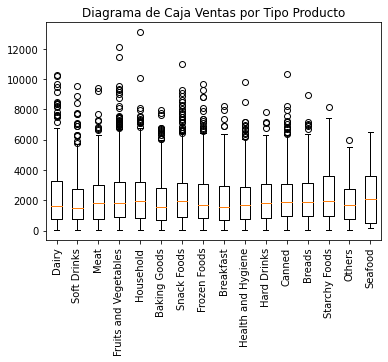

In [40]:
plt.boxplot([df.loc[df['Item_Type']==tipos_prod[0],:]['Item_Outlet_Sales'],df.loc[df['Item_Type']==tipos_prod[1],:]['Item_Outlet_Sales'],df.loc[df['Item_Type']==tipos_prod[2],:]['Item_Outlet_Sales'],df.loc[df['Item_Type']==tipos_prod[3],:]['Item_Outlet_Sales'],df.loc[df['Item_Type']==tipos_prod[4],:]['Item_Outlet_Sales'],df.loc[df['Item_Type']==tipos_prod[5],:]['Item_Outlet_Sales'],df.loc[df['Item_Type']==tipos_prod[6],:]['Item_Outlet_Sales'],df.loc[df['Item_Type']==tipos_prod[7],:]['Item_Outlet_Sales'],df.loc[df['Item_Type']==tipos_prod[8],:]['Item_Outlet_Sales'],df.loc[df['Item_Type']==tipos_prod[9],:]['Item_Outlet_Sales'],df.loc[df['Item_Type']==tipos_prod[10],:]['Item_Outlet_Sales'],df.loc[df['Item_Type']==tipos_prod[11],:]['Item_Outlet_Sales'],df.loc[df['Item_Type']==tipos_prod[12],:]['Item_Outlet_Sales'],df.loc[df['Item_Type']==tipos_prod[13],:]['Item_Outlet_Sales'],df.loc[df['Item_Type']==tipos_prod[14],:]['Item_Outlet_Sales'],df.loc[df['Item_Type']==tipos_prod[15],:]['Item_Outlet_Sales']],labels=tipos_prod)
ax = plt.gca()
ax.set_title('Diagrama de Caja Ventas por Tipo Producto')
ax.set_xticklabels(labels=tipos_prod,rotation=90);

Del diagrama anterior podemos ver que las ventas se mueven dentro valores similares entre los distintos tipos de producto, y que se concentran en valores bajos. Dentro de las categorías que presentan outliers más significativos, se encuentra Household y Fruits and Vegetables.

## Comportamiento de Ventas Item-Local por Local

A continuación revisaremos el comportamiento del Precio Item-Local por local, dado que puede existir una variación en las ventas dependiendo del local en que se vende.

Al igual que en el análisis anterior, procedemos a realizar los histogramas primero.

In [27]:
lista=list(set(df['Outlet_Identifier']))

10

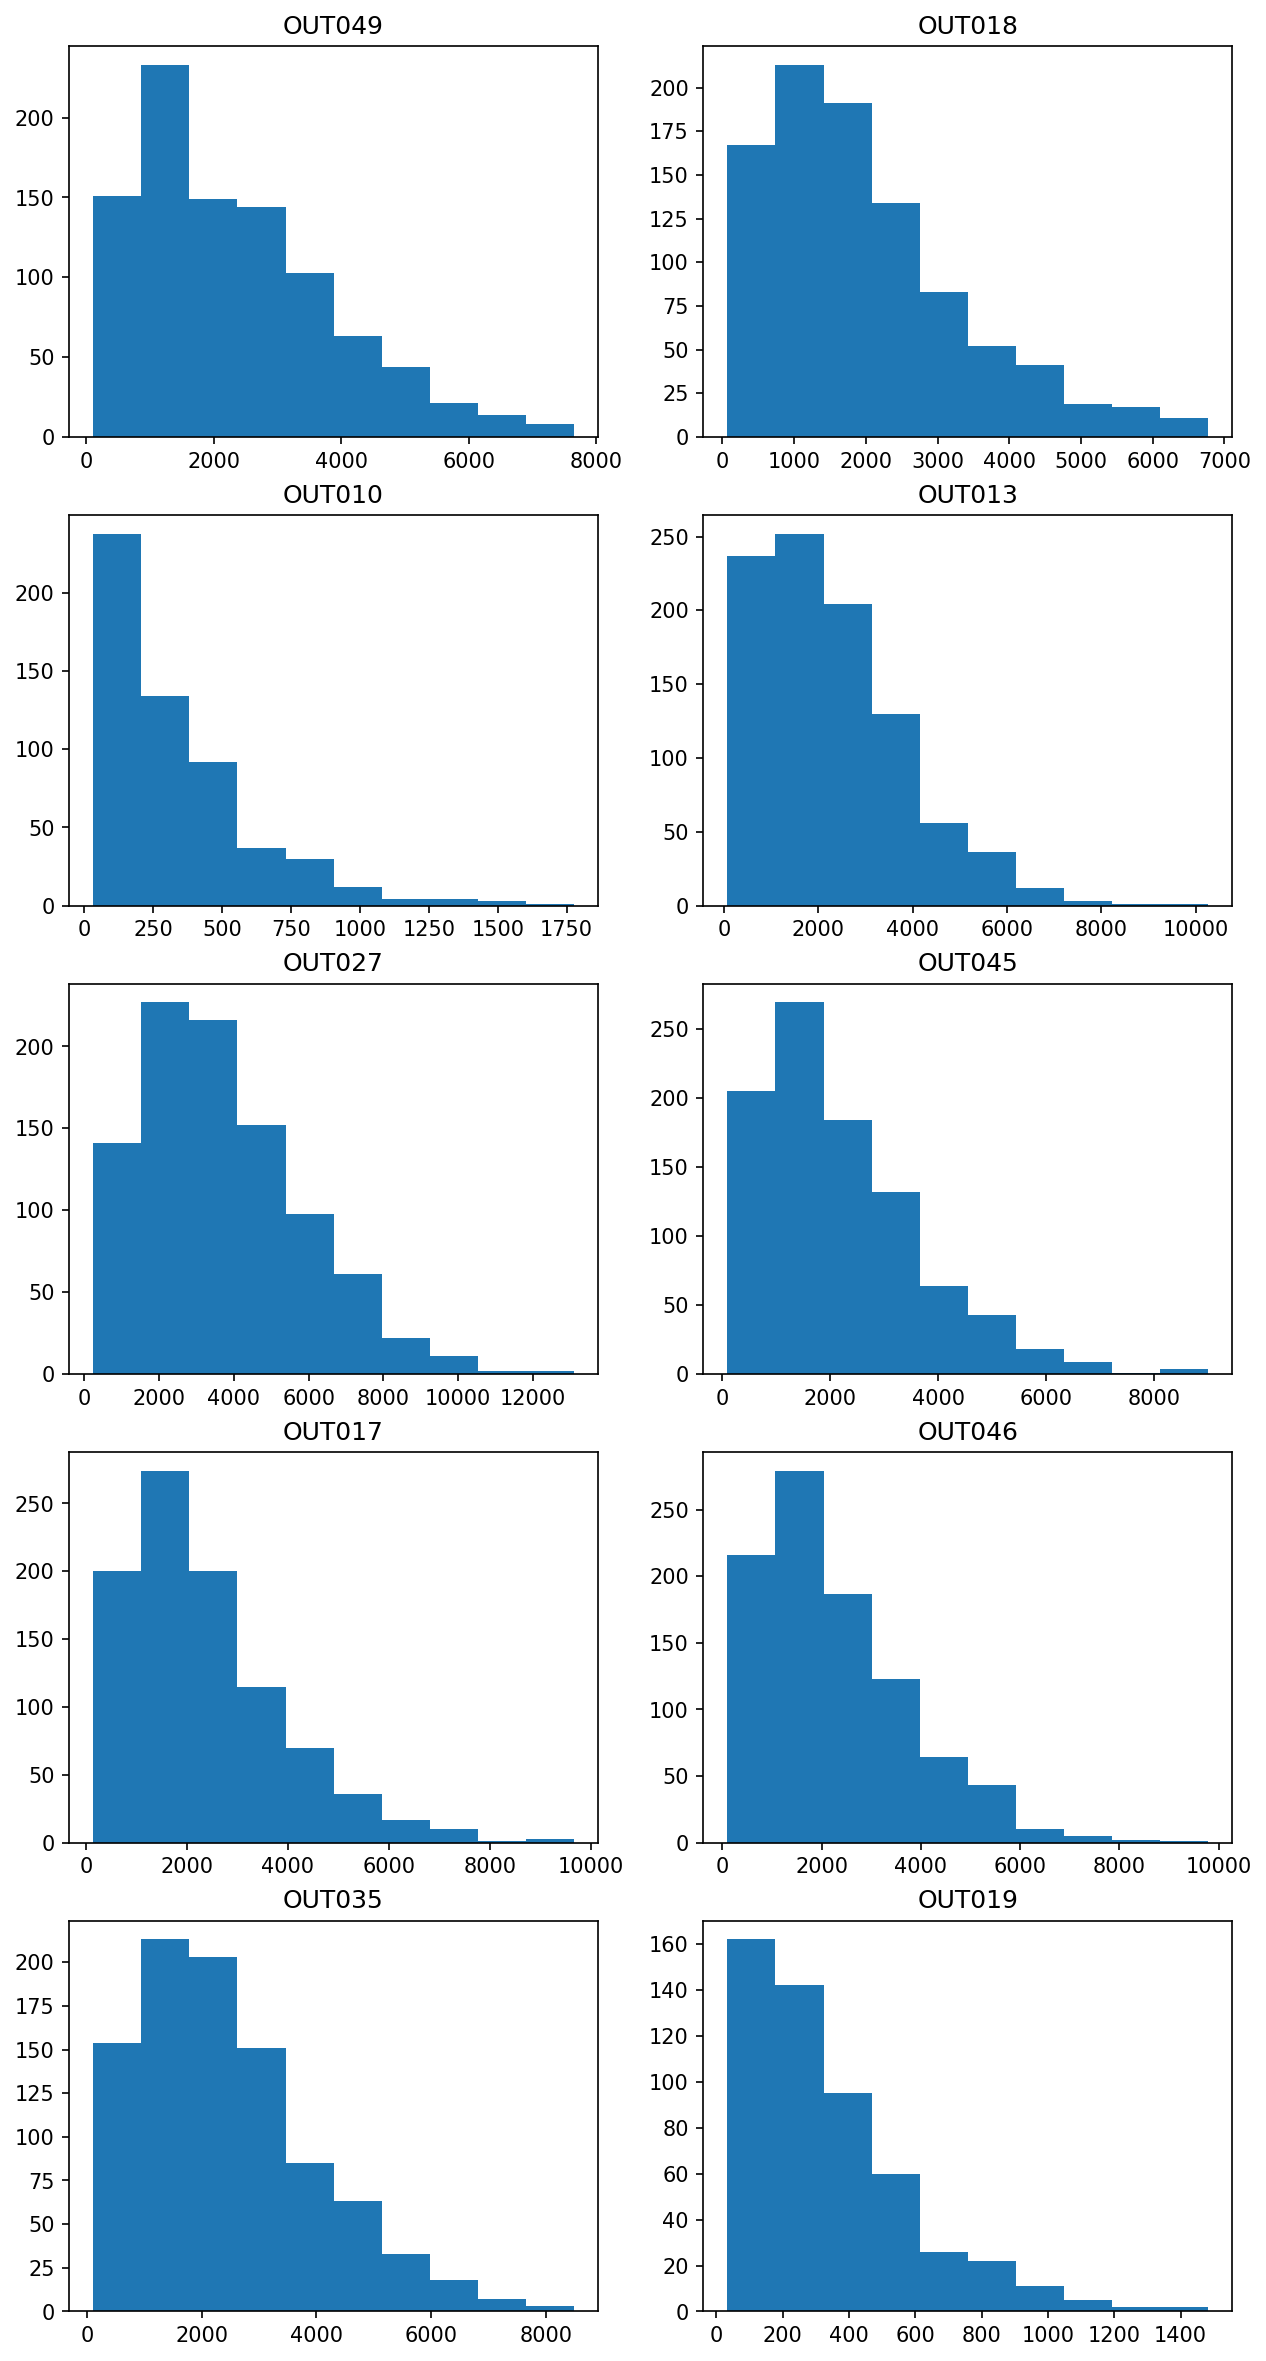

In [30]:
lista=list(set(df['Outlet_Identifier']))
tiendas=list(df['Outlet_Identifier'].drop_duplicates())
fig1 = plt.figure(figsize=(10,20),dpi=150)

ax1 = fig1.add_subplot(5,2,1)
ax2 = fig1.add_subplot(5,2,2)
ax3 = fig1.add_subplot(5,2,3)
ax4 = fig1.add_subplot(5,2,4)
ax5 = fig1.add_subplot(5,2,5)
ax6 = fig1.add_subplot(5,2,6)
ax7 = fig1.add_subplot(5,2,7)
ax8 = fig1.add_subplot(5,2,8)
ax9 = fig1.add_subplot(5,2,9)
ax10 = fig1.add_subplot(5,2,10)


ax1.hist(df.loc[df['Outlet_Identifier']==tiendas[0],:]['Item_Outlet_Sales'],bins=10)
ax2.hist(df.loc[df['Outlet_Identifier']==tiendas[1],:]['Item_Outlet_Sales'],bins=10)
ax3.hist(df.loc[df['Outlet_Identifier']==tiendas[2],:]['Item_Outlet_Sales'],bins=10)
ax4.hist(df.loc[df['Outlet_Identifier']==tiendas[3],:]['Item_Outlet_Sales'],bins=10)
ax5.hist(df.loc[df['Outlet_Identifier']==tiendas[4],:]['Item_Outlet_Sales'],bins=10)
ax6.hist(df.loc[df['Outlet_Identifier']==tiendas[5],:]['Item_Outlet_Sales'],bins=10)
ax7.hist(df.loc[df['Outlet_Identifier']==tiendas[6],:]['Item_Outlet_Sales'],bins=10)
ax8.hist(df.loc[df['Outlet_Identifier']==tiendas[7],:]['Item_Outlet_Sales'],bins=10)
ax9.hist(df.loc[df['Outlet_Identifier']==tiendas[8],:]['Item_Outlet_Sales'],bins=10)
ax10.hist(df.loc[df['Outlet_Identifier']==tiendas[9],:]['Item_Outlet_Sales'],bins=10)


ax1.set_title(tiendas[0])
ax2.set_title(tiendas[1])
ax3.set_title(tiendas[2])
ax4.set_title(tiendas[3])
ax5.set_title(tiendas[4])
ax6.set_title(tiendas[5])
ax7.set_title(tiendas[6])
ax8.set_title(tiendas[7])
ax9.set_title(tiendas[8])
ax10.set_title(tiendas[9])

plt.show()

Podemos notar que al igual que en el tipo de productos, las ventas se concentran en montos menores. Adicionalmente, podemos notar que el local 10 y 19 tienen ventas de montos significativamente menores respecto al resto.

Al realizar el diagrama de caja, podemos ver que en general todas las tiendas presentan outliers, y que en el caso de la tienda 27, se nota significativamente la diferencia en el monto de las ventas respecto al resto de tiendas, donde los cuartiles tienen más diferencia entre sus limites que el resto.

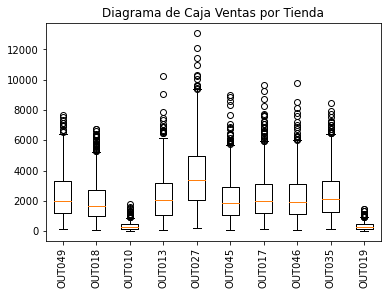

In [37]:
plt.boxplot([df.loc[df['Outlet_Identifier']==tiendas[0],:]['Item_Outlet_Sales'],df.loc[df['Outlet_Identifier']==tiendas[1],:]['Item_Outlet_Sales'],df.loc[df['Outlet_Identifier']==tiendas[2],:]['Item_Outlet_Sales'],df.loc[df['Outlet_Identifier']==tiendas[3],:]['Item_Outlet_Sales'],df.loc[df['Outlet_Identifier']==tiendas[4],:]['Item_Outlet_Sales'],df.loc[df['Outlet_Identifier']==tiendas[5],:]['Item_Outlet_Sales'],df.loc[df['Outlet_Identifier']==tiendas[6],:]['Item_Outlet_Sales'],df.loc[df['Outlet_Identifier']==tiendas[7],:]['Item_Outlet_Sales'],df.loc[df['Outlet_Identifier']==tiendas[8],:]['Item_Outlet_Sales'],df.loc[df['Outlet_Identifier']==tiendas[9],:]['Item_Outlet_Sales']],labels=tiendas)
ax = plt.gca()
ax.set_title('Diagrama de Caja Ventas por Tienda')
ax.set_xticklabels(labels=tiendas,rotation=90);

## Análisis de Item_MRP

Al revisar la variable con más correlación con las ventas, podemos notar que no existe un valor con frecuencia significativa que se distinga del resto.

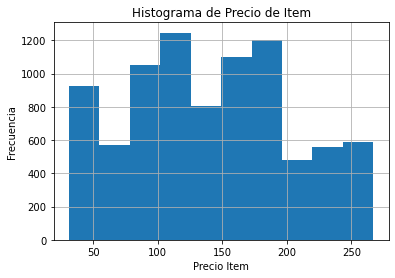

In [44]:
df['Item_MRP'].hist()
plt.title('Histograma de Precio de Item')
plt.xlabel('Precio Item')
plt.ylabel('Frecuencia')
plt.show()

En el diagrama de caja, podemos notar que los precios tienen máximos parecidos a excepcion de la categoría Breakfast donde su precio máximo es menor. Por otro lado, podemos notar que Starchy Foods y Frozen Foods presentan distribución de datos donde la mediana tiene valores mayores respecto al resto de productos.  

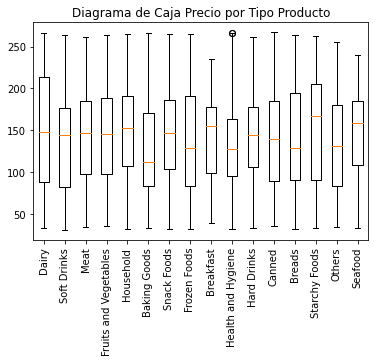

In [45]:
plt.boxplot([df.loc[df['Item_Type']==tipos_prod[0],:]['Item_MRP'],df.loc[df['Item_Type']==tipos_prod[1],:]['Item_MRP'],df.loc[df['Item_Type']==tipos_prod[2],:]['Item_MRP'],df.loc[df['Item_Type']==tipos_prod[3],:]['Item_MRP'],df.loc[df['Item_Type']==tipos_prod[4],:]['Item_MRP'],df.loc[df['Item_Type']==tipos_prod[5],:]['Item_MRP'],df.loc[df['Item_Type']==tipos_prod[6],:]['Item_MRP'],df.loc[df['Item_Type']==tipos_prod[7],:]['Item_MRP'],df.loc[df['Item_Type']==tipos_prod[8],:]['Item_MRP'],df.loc[df['Item_Type']==tipos_prod[9],:]['Item_MRP'],df.loc[df['Item_Type']==tipos_prod[10],:]['Item_MRP'],df.loc[df['Item_Type']==tipos_prod[11],:]['Item_MRP'],df.loc[df['Item_Type']==tipos_prod[12],:]['Item_MRP'],df.loc[df['Item_Type']==tipos_prod[13],:]['Item_MRP'],df.loc[df['Item_Type']==tipos_prod[14],:]['Item_MRP'],df.loc[df['Item_Type']==tipos_prod[15],:]['Item_MRP']],labels=tipos_prod)
ax = plt.gca()
ax.set_title('Diagrama de Caja Precio por Tipo Producto')
ax.set_xticklabels(labels=tipos_prod,rotation=90);